In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df_anime=pd.read_csv('anime (1).csv')

In [3]:
df_rating=pd.read_csv('rating.csv')

In [4]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
df_anime.shape

(12294, 7)

In [7]:
df_rating.shape

(7813737, 3)

# Handling missing values

In [8]:
df_anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
df_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

Visualization of missing values

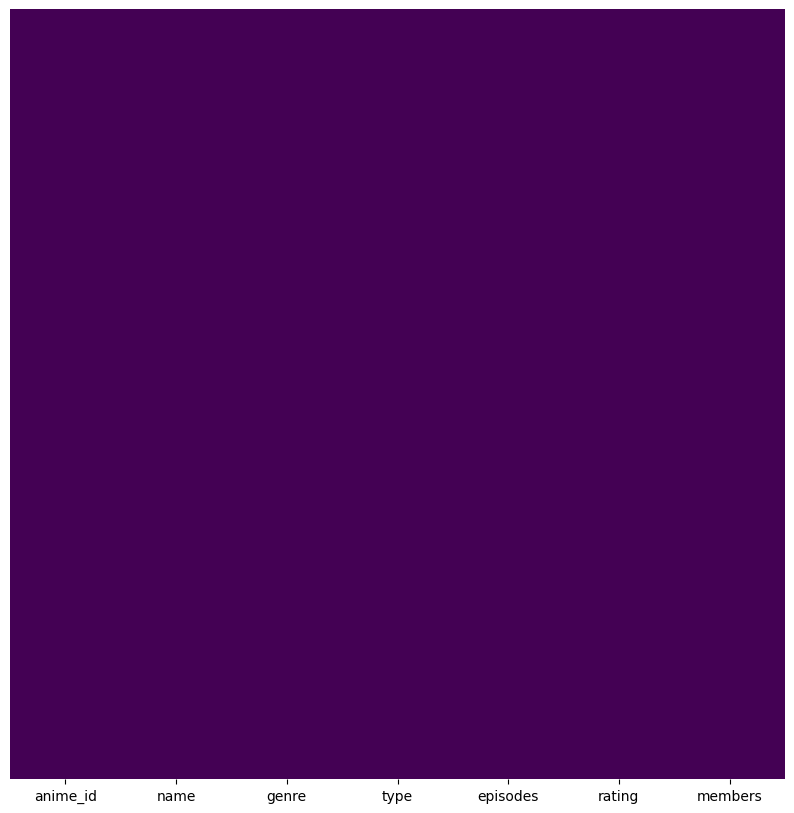

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(df_anime.isnull(),cmap='viridis',cbar=False,yticklabels=False)
plt.show()

In [11]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [12]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [13]:
np.around((df_anime.isnull().sum().sort_values(ascending=False)/len(df_anime.index))*100,2)

rating      1.87
genre       0.50
type        0.20
anime_id    0.00
name        0.00
episodes    0.00
members     0.00
dtype: float64

In [14]:
df_anime.index

RangeIndex(start=0, stop=12294, step=1)

In [15]:
print(df_anime['type'].mode())
print(df_anime['genre'].mode())

0    TV
Name: type, dtype: object
0    Hentai
Name: genre, dtype: object


In [16]:
df_anime['type'].value_counts().nlargest()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Name: type, dtype: int64

In [17]:
df_anime['genre'].value_counts().nlargest()

Hentai                   823
Comedy                   523
Music                    301
Kids                     199
Comedy, Slice of Life    179
Name: genre, dtype: int64

Handling the missing values

Deleting the rating which are 0

In [18]:
df_anime=df_anime[~np.isnan(df_anime['rating'])]

filling categorical feature with mode values

In [19]:
df_anime['genre'].fillna(df_anime['genre'].dropna().mode().values[0],inplace=True)

In [20]:
df_anime['type'].fillna(df_anime['type'].dropna().mode().values[0],inplace=True)

In [21]:
df_anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Filling Nan values in rating dataframe

In [22]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


-1 shows that user did not register a rating 

In [23]:
df_rating['rating'] = df_rating['rating'].apply(lambda x : np.nan if x == -1 else x)

In [24]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


Combining both the dataframe that is anime and rating on anime_id column

In [41]:
df_anime_rating=pd.merge(df_anime_tv,df_rating ,right_on='anime_id',left_on='anime_id',suffixes=['_user',''])

getting only user_id , name, rating from merge dataframe

In [42]:
df_rating_anime_new=df_anime_rating.loc[:,['user_id','name','rating']]

In [43]:
df_rating_anime_new

,user_id,name,rating
0,3,Fullmetal Alchemist: Brotherhood,10.0
1,10,Fullmetal Alchemist: Brotherhood,10.0
2,11,Fullmetal Alchemist: Brotherhood,8.0
3,12,Fullmetal Alchemist: Brotherhood,9.0
4,17,Fullmetal Alchemist: Brotherhood,10.0
...,...,...,...
5283591,25856,Zukkoke Knight: Don De La Mancha,4.0
5283592,48766,Zukkoke Knight: Don De La Mancha,NaN
5283593,49127,Zukkoke Knight: Don De La Mancha,6.0
5283594,51693,Zukkoke Knight: Don De La Mancha,7.0


Creating  a pivot table for help us to analyze the similarity

In [56]:
pivot_anime_rating=df_rating_anime_new.pivot_table(index=['user_id'], columns= ['name'], values='rating')

In [57]:
df_rating_anime_new['name']

0          Fullmetal Alchemist: Brotherhood
1          Fullmetal Alchemist: Brotherhood
2          Fullmetal Alchemist: Brotherhood
3          Fullmetal Alchemist: Brotherhood
4          Fullmetal Alchemist: Brotherhood
                         ...               
5283591    Zukkoke Knight: Don De La Mancha
5283592    Zukkoke Knight: Don De La Mancha
5283593    Zukkoke Knight: Don De La Mancha
5283594    Zukkoke Knight: Don De La Mancha
5283595                    Zumomo to Nupepe
Name: name, Length: 5283596, dtype: object

In [58]:
pivot_anime_rating

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,12-sai.: Chicchana Mune no Tokimeki 2nd Season,2020 Nyeon Ujuui Wonder Kiddy,21 Emon,...,"Zone of the Enders: Dolores, I",Zukkoke Knight: Don De La Mancha,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Enginerring the pivot table dataframe

1. Value normalization.
2. Filling Nan values as 0.
3. Transposing the pivot for the next step.
4. Dropping columns with the values of 0 (unrated).
5. Using scipy package to convert to sparse matrix format for the similarity computation

In [61]:
pivot_anime_rating_normalization=pivot_anime_rating.apply(lambda x : (x-np.mean(x)/np.max(x)-np.min(x)),axis=1)

In [62]:
pivot_anime_rating_normalization.fillna(0,inplace=True)

In [69]:
pivot_anime_rating_normalization_t=pivot_anime_rating_normalization.T

In [71]:
pivot_anime_rating_normalization_t=pivot_anime_rating_normalization_t.loc[:, (pivot_anime_rating_normalization_t != 0).any(axis=0)]

In [73]:
pivot_sparse=sp.sparse.csr_matrix(pivot_anime_rating_normalization_t.values)

Applying the cosine simialrity on our sparse matrix 


Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction

In [76]:
anime_similarity= cosine_similarity(pivot_sparse)

In [80]:
df_anime_similarity=pd.DataFrame(anime_similarity, index=pivot_anime_rating_normalization_t.index, columns=pivot_anime_rating_normalization_t.index)

In [93]:
df_anime_similarity

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,12-sai.: Chicchana Mune no Tokimeki 2nd Season,2020 Nyeon Ujuui Wonder Kiddy,21 Emon,...,"Zone of the Enders: Dolores, I",Zukkoke Knight: Don De La Mancha,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
name,,,,,,,,,,,,,,,,,,,,,
.hack//Roots,1.000000,0.551824,0.537200,0.130825,0.167938,0.178731,0.046068,0.000000,0.0,0.00000,...,0.082426,0.023462,0.148014,0.149719,0.048936,0.048298,0.106442,0.193232,0.181540,0.143706
.hack//Sign,0.551824,1.000000,0.545966,0.116408,0.158916,0.172156,0.043198,0.000000,0.0,0.00000,...,0.113578,0.017450,0.163386,0.186060,0.048080,0.048204,0.104198,0.262362,0.211127,0.170119
.hack//Tasogare no Udewa Densetsu,0.537200,0.545966,1.000000,0.114808,0.144417,0.158002,0.040285,0.000000,0.0,0.00000,...,0.090718,0.025894,0.121250,0.128860,0.039831,0.038874,0.101695,0.211414,0.167559,0.128858
009-1,0.130825,0.116408,0.114808,1.000000,0.092067,0.112954,0.066195,0.000000,0.0,0.00000,...,0.111702,0.000000,0.065802,0.063677,0.068529,0.078332,0.102220,0.124254,0.125507,0.105526
07-Ghost,0.167938,0.158916,0.144417,0.092067,1.000000,0.273162,0.056003,0.000000,0.0,0.00000,...,0.038367,0.017166,0.150131,0.155597,0.025685,0.024717,0.078749,0.133456,0.214942,0.207788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gdgd Fairies 2,0.048298,0.048204,0.038874,0.078332,0.024717,0.044922,0.128137,0.000000,0.0,0.00000,...,0.038490,0.000000,0.051514,0.050816,0.876090,1.000000,0.117955,0.029920,0.026442,0.023734
iDOLM@STER Xenoglossia,0.106442,0.104198,0.101695,0.102220,0.078749,0.109053,0.066250,0.000000,0.0,0.00000,...,0.079034,0.000000,0.101933,0.111729,0.091153,0.117955,1.000000,0.109482,0.096142,0.091770
s.CRY.ed,0.193232,0.262362,0.211414,0.124254,0.133456,0.117579,0.016333,0.000000,0.0,0.00000,...,0.126538,0.000000,0.105860,0.137698,0.024821,0.029920,0.109482,1.000000,0.166393,0.130240


In [94]:
def anime_recommendation(anime_name):
    number=1
    print('Recommended because you watched {}:\n'.format(anime_name))
    for anime in df_anime_similarity.sort_values(by=anime_name, ascending = False).index[1:6]:
         print(f'#{number}: {anime}, {round(df_anime_similarity[anime][anime_name]*100,2)}% match')
         number +=1
    

In [98]:
anime_recommendation('Death Note')

Recommended because you watched Death Note:

#1: Code Geass: Hangyaku no Lelouch, 67.61% match
#2: Code Geass: Hangyaku no Lelouch R2, 65.16% match
#3: Shingeki no Kyojin, 63.01% match
#4: Fullmetal Alchemist: Brotherhood, 62.09% match
#5: Elfen Lied, 60.66% match
